# Construction and application of variations on the cylindrical gravitational waves of Weber, Wheeler, and Bonnor by Mishima & Tomizawa
##  Geoff Cope
##  Univeristy of Utah
##  January 2, 2022

https://arxiv.org/abs/1704.03251

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz = symbols( 't rho phi z dt drho dphi dz' ) 

In [4]:
psi = Function('psi')(rho,t)
psi

In [5]:
omega = Function('omega')(rho,t)
omega

In [6]:
gamma = Function('gamma')(rho,t)
gamma

In [7]:
variables = Matrix( [t,rho,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix( [dt,drho,dphi,dz] )
differentials

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [9]:
lineElement = expand( exp(2*psi) * ( dz + omega * dphi)**2 + rho**2 * exp(-2*psi) * dphi**2 + exp(2*(gamma-psi)) * (-dt**2 +drho**2) ) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                                                                  ⎤
⎢-ℯ         ⋅ℯ                      0                              0                            0         ⎥
⎢                                                                                                         ⎥
⎢                          2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                                          ⎥
⎢           0             ℯ         ⋅ℯ                             0                            0         ⎥
⎢                                                                                                         ⎥
⎢                                                  2  -2⋅ψ(ρ, t)    2        2⋅ψ(ρ, t)           2⋅ψ(ρ, t)⎥
⎢           0                       0             ρ ⋅ℯ           + ω (ρ, t)⋅ℯ           ω(ρ, t)⋅ℯ         ⎥
⎢                                                                                                         ⎥
⎢                           

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡  2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                                                                  ⎤
⎢-ℯ         ⋅ℯ                      0                              0                            0         ⎥
⎢                                                                                                         ⎥
⎢                          2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                                          ⎥
⎢           0             ℯ         ⋅ℯ                             0                            0         ⎥
⎢                                                                                                         ⎥
⎢                                                  2  -2⋅ψ(ρ, t)    2        2⋅ψ(ρ, t)           2⋅ψ(ρ, t)⎥
⎢           0                       0             ρ ⋅ℯ           + ω (ρ, t)⋅ℯ           ω(ρ, t)⋅ℯ         ⎥
⎢                                                                                                         ⎥
⎢                           

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                                       
⎢                                                                                                                                       
⎢                                                                                                                                       
⎢                                                                                                                                       
⎢⎡∂             ∂            ∂             ∂                                                                                            
⎢⎢──(γ(ρ, t)) - ──(ψ(ρ, t))  ──(γ(ρ, t)) - ──(ψ(ρ, t))                                             0                                    
⎢⎢∂t            ∂t           ∂ρ            ∂ρ                                                                                           
⎢⎢                                       

In [17]:
Ric = RicciTensor.from_metric(metric)
simplify(Ric.tensor())

⎡                                                                                                                                   2   
⎢                                                                               ∂             ∂              4⋅ψ(ρ, t) ⎛∂          ⎞    
⎢  2              2              2                           2     2            ──(γ(ρ, t))   ──(ψ(ρ, t))   ℯ         ⋅⎜──(ω(ρ, t))⎟    
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂ρ            ∂ρ                       ⎝∂t         ⎠    
⎢───(γ(ρ, t)) - ───(γ(ρ, t)) - ───(ψ(ρ, t)) - 2⋅⎜──(ψ(ρ, t))⎟  + ───(ψ(ρ, t)) + ─────────── - ─────────── - ─────────────────────────   
⎢  2              2              2              ⎝∂t         ⎠      2                 ρ             ρ                      2             
⎢∂ρ             ∂t             ∂ρ                                ∂t                                                    2⋅ρ              
⎢                                        

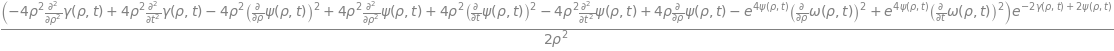

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                                                ⎛         2            
⎢                                                                                                                ⎜     2  ∂             
⎢                                                                               ∂             ∂             0.25⋅⎜- 4⋅ρ ⋅───(γ(ρ, t)) + 
⎢  2              2              2                           2     2            ──(γ(ρ, t))   ──(ψ(ρ, t))        ⎜         2            
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂ρ            ∂ρ                 ⎝       ∂ρ             
⎢───(γ(ρ, t)) - ───(γ(ρ, t)) - ───(ψ(ρ, t)) - 2⋅⎜──(ψ(ρ, t))⎟  + ───(ψ(ρ, t)) + ─────────── - ─────────── + ────────────────────────────
⎢  2              2              2              ⎝∂t         ⎠      2                 ρ             ρ                                    
⎢∂ρ             ∂t             ∂ρ        

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [22]:
einsteinSimplifed = simplify(einst.tensor()) 
einsteinSimplifed

⎡                                                                                   2                                2                  
⎢                                        ∂                   4⋅ψ(ρ, t) ⎛∂          ⎞          4⋅ψ(ρ, t) ⎛∂          ⎞                   
⎢               2                2   1.0⋅──(γ(ρ, t))   0.25⋅ℯ         ⋅⎜──(ω(ρ, t))⎟    0.25⋅ℯ         ⋅⎜──(ω(ρ, t))⎟                   
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂ρ                            ⎝∂ρ         ⎠                    ⎝∂t         ⎠                   
⎢- ⎜──(ψ(ρ, t))⎟  - ⎜──(ψ(ρ, t))⎟  + ─────────────── - ────────────────────────────── - ──────────────────────────────                  
⎢  ⎝∂ρ         ⎠    ⎝∂t         ⎠           ρ                         2                                2                                
⎢                                                                    ρ                                ρ                                 
⎢                                        

In [23]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                                                                   2   
⎢                                                                               ∂             ∂              4⋅ψ(ρ, t) ⎛∂          ⎞    
⎢  2              2              2                           2     2            ──(γ(ρ, t))   ──(ψ(ρ, t))   ℯ         ⋅⎜──(ω(ρ, t))⎟    
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂ρ            ∂ρ                       ⎝∂t         ⎠    
⎢───(γ(ρ, t)) - ───(γ(ρ, t)) - ───(ψ(ρ, t)) - 2⋅⎜──(ψ(ρ, t))⎟  + ───(ψ(ρ, t)) + ─────────── - ─────────── - ─────────────────────────   
⎢  2              2              2              ⎝∂t         ⎠      2                 ρ             ρ                      2             
⎢∂ρ             ∂t             ∂ρ                                ∂t                                                    2⋅ρ              
⎢                                        

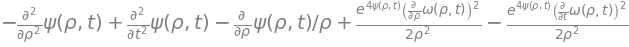

In [35]:
equation2 = expand((1/rho**2)*ricciSimplified[3,3].args[1] ) 
equation2

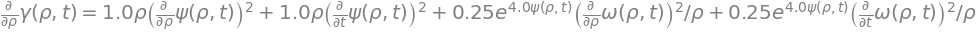

In [36]:
equation4 = Eq(diff(gamma,rho) , expand(solve( einsteinSimplifed[1,1], diff(gamma,rho) )[0] ) )
equation4

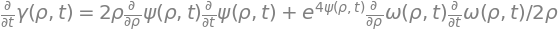

In [37]:
equation5 = Eq(diff(gamma,t),solve( ricciSimplified[1,0] , diff(gamma,t))[0] )
equation5

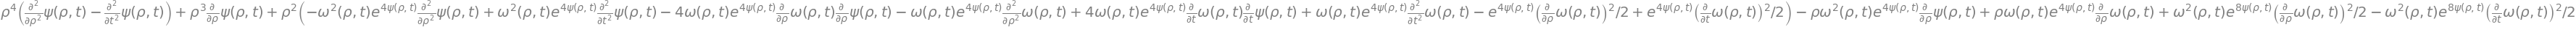

In [41]:
collect(ricciSimplified[2,2].args[1], rho**2 ) 

In [43]:
vacuumFieldEquations = Matrix([equation2,equation4,equation5])
vacuumFieldEquations 

⎡                                                                                    2                           2              ⎤
⎢                                              ∂              4⋅ψ(ρ, t) ⎛∂          ⎞     4⋅ψ(ρ, t) ⎛∂          ⎞               ⎥
⎢                  2              2            ──(ψ(ρ, t))   ℯ         ⋅⎜──(ω(ρ, t))⎟    ℯ         ⋅⎜──(ω(ρ, t))⎟               ⎥
⎢                 ∂              ∂             ∂ρ                       ⎝∂ρ         ⎠               ⎝∂t         ⎠               ⎥
⎢              - ───(ψ(ρ, t)) + ───(ψ(ρ, t)) - ─────────── + ───────────────────────── - ─────────────────────────              ⎥
⎢                  2              2                 ρ                      2                           2                        ⎥
⎢                ∂ρ             ∂t                                      2⋅ρ                         2⋅ρ                         ⎥
⎢                                                                                         